# Monte Carlo Simulation

### Import the necessary moducles
- matplotlib for plotting
- numpy for random, exp, ...
- itertools for generating pairwise combination of points


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

### Make initial coordinates using random points.
Define a function for making initial coordinates.
**np.random.uniform(a,b, (m,n))** makes an (**m**x**n**) array of random numbers. Each number is in the range a, b  

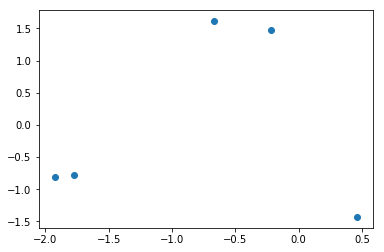

In [2]:
def make_initial_coordinates(n_pts, b_l):
    return np.random.uniform(-b_l, b_l, (n_pts, 2))
ic = make_initial_coordinates(5, 2)
plt.scatter(ic[:,0], ic[:,1])
plt.show()

### Move points
Define a function for moving each points by a small unit ('change').  The direction of movement is decided by the random number. In this process, if the point moves out of the box, it will be moved to the opposite side of the box, so that the number of points in the box remains same.

**np.where(condition)** gives the array indices where the condition is true.

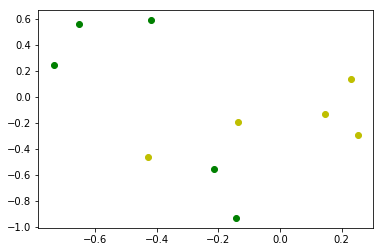

In [3]:
def move(coords, length, change):

    new_coords = coords + np.random.uniform(-change, change, coords.shape)
    a, b = np.where(np.abs(new_coords) > length/2)
    for i, j in zip(a,b):
        t = new_coords[i][j]
        if t > 0:
            new_coords[i][j] -= length
        else:
            new_coords[i][j] += length
    return new_coords
arr1 = make_initial_coordinates(5, 1) 
arr2 = move(arr1, 1, 0.5)
plt.plot(arr1[:,0], arr1[:, 1], 'og')
plt.plot(arr2[:,0], arr2[:, 1], 'oy')

### Function for Calculating Lennard-Jones energy
Reduced units are used for simplicity

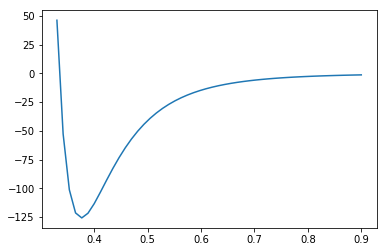

In [5]:
def lj(r):
    # epsilon/KB(K) = 125.7
    # sigma (nm) =  0.3345
    # 4*epsilon((sigma/r)^12-(sigma/r)^6)
    epsilon = 125.7
    sigma  =  0.3345
    A = 4*epsilon*sigma**12
    B = 4*epsilon*sigma**6
    E = A/r**12 - B/r**6
    return E

x = np.linspace(0.33,0.9)
y = [lj(a) for a in x]
plt.plot(x,y)
plt.show()

### Calculate pair-wise interaction energy for all points
This function calculates the total energy of the system by summing all the pair-wise interaction energy.
- distance = **np.linalg.norm(a-b)
- **itertools.combinations(coordinates, n)** gives coordinate pairs for all combinations of points

In [6]:
def calc_energy(coordinates):
    r = [np.linalg.norm(a-b) for a, b in itertools.combinations(coordinates, 2)]
    e = 0.0
    for i in r:
        e = e + lj(i)
    return e

coords = make_initial_coordinates(2, 1)
calc_energy(coords)
nc = move(coords, 2, 0.2)
calc_energy(nc)

-0.010303745759055977

### Set parameters
Set the number of points, number of steps in the simulaation run, the length of the box, maximum change in each move, and $ \beta = {1/k_{B}T} $ in reduced units.

In [10]:
number_of_points = 3
number_of_steps = 500
box_length = 2
delta = 0.1
beta = 1

Mkae emtpy list for storing energy data

In [12]:
count_trj = []
energy_trj = []

### Simulation
If the energy drops after moving, the move is accepted.  Otherwise, it is accepted if the $ probability < e^{(-\beta*\Delta E)} $.

In [13]:
initial_coordinates = make_initial_coordinates(number_of_points, box_length)
initial_energy = calc_energy(initial_coordinates)
print(initial_energy)

current_coordinates = initial_coordinates
current_energy = initial_energy
for i in range(number_of_steps):
    moved_coordinates = move(current_coordinates, box_length, delta)
    new_energy = calc_energy(moved_coordinates)
    prob = np.random.uniform()
    delta_energy = new_energy - current_energy
    boltz = np.exp(-beta*delta_energy)
    if delta_energy < 0 or prob < boltz:
        count_trj.append(i)
        energy_trj.append(new_energy)
        current_coordinates = moved_coordinates
        current_energy = new_energy
    else:
        i -= 1


final_coordinates = current_coordinates
final_energy = calc_energy(current_coordinates)
print(final_energy)

-0.5417576318381726
-363.04558698527217


### Plotting

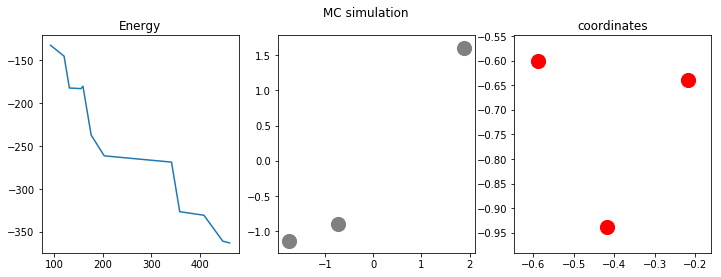

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(12, 4)
ax = axs[0]
ax.plot(count_trj[10:], energy_trj[10:])
ax.set_title('Energy')

ax = axs[1]
ax.scatter(initial_coordinates[:, 0], initial_coordinates[:, 1], color='grey', s=200)
ax = axs[2]
ax.scatter(final_coordinates[:, 0], final_coordinates[:, 1], color='red', s=200)
ax.set_title('coordinates')

fig.suptitle('MC simulation')

plt.show()

### Complete Code

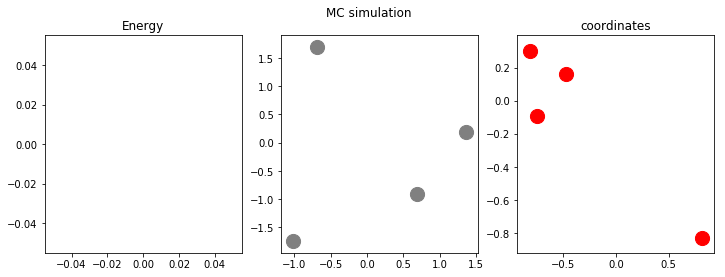

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy.optimize import minimize


def make_initial_coordinates(n_pts, b_l):
    return np.random.uniform(-b_l, b_l, (n_pts, 2))

def move(coords, length, change):

    new_coords = coords + np.random.uniform(-change, change, coords.shape)
    a, b = np.where(np.abs(new_coords) > length/2)
    for i, j in zip(a,b):
        t = new_coords[i][j]
        if t > 0:
            new_coords[i][j] -= length
        else:
            new_coords[i][j] += length
    return new_coords


def lj(r):
    # eps = 127.5
    # sig = 0.3345
    # A = 4*eps*sig**12
    # B = 4*eps*sig**6
    # return A/r**12 - B/r**6
    epsilon = 125.7
    sigma  =  0.3345
    A = 4*epsilon*sigma**12
    B = 4*epsilon*sigma**6
    E = A/r**12 - B/r**6
    return E


def calc_energy(coordinates):
    r = [np.linalg.norm(a-b) for a, b in itertools.combinations(coordinates, 2)]
    e = 0.0
    for i in r:
        e = e + lj(i)
    return e


number_of_points = 4
number_of_steps = 200
box_length = 2
delta = 0.1
beta = 1

initial_coordinates = make_initial_coordinates(number_of_points, box_length)
initial_energy = calc_energy(initial_coordinates)
count_trj = []
energy_trj = []

current_coordinates = initial_coordinates
current_energy = initial_energy
count = 0
while count < number_of_steps:
    moved_coordinates = move(current_coordinates, box_length, delta)
    new_energy = calc_energy(moved_coordinates)
    prob = np.random.uniform()
    delta_energy = new_energy - current_energy
    boltz = np.exp(-beta*delta_energy)
    if delta_energy < 0 or prob < boltz:
        count_trj.append(count)
        energy_trj.append(new_energy)
        current_coordinates = moved_coordinates
        current_energy = new_energy
    count += 1


final_coordinates = current_coordinates
final_energy = calc_energy(current_coordinates)

fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(12, 4)
ax = axs[0]
ax.plot(count_trj[10:], energy_trj[10:])
ax.set_title('Energy')

ax = axs[1]
ax.scatter(initial_coordinates[:, 0], initial_coordinates[:, 1], color='grey', s=200)
ax = axs[2]
ax.scatter(final_coordinates[:, 0], final_coordinates[:, 1], color='red', s=200)
ax.set_title('coordinates')

fig.suptitle('MC simulation')

plt.show()